In [332]:
import pandas as pd
import numpy as np
from scipy import stats

In [333]:
df = pd.read_excel('../data/Handball Woman European Data Set.xlsx')

In [334]:
df.tail(6)

,Unnamed: 0,Phase,Match,Team,No,Name,Goals,Shots,%,7m%,...,2+2,AS,R7,ST,BS,P7,TO,Time,scoring,MVP
1494,1494,FINAL,FRA-NOR,NOR,13,DALE Kari,1,1,100,0,...,0,0,0,0,0,0,0,60.000000,0.2,0
1495,1495,FINAL,FRA-NOR,NOR,16,LUNDE Katrine,0,0,0,0,...,0,0,0,0,0,0,0,0.283333,0.0,0
1496,1496,FINAL,FRA-NOR,NOR,20,JACOBSEN Marit,0,0,0,0,...,0,0,0,0,0,0,0,0.000000,0.0,0
1497,1497,FINAL,FRA-NOR,NOR,23,HERREM Camilla,3,4,75,0,...,0,0,0,1,0,0,0,37.000000,3.1,0
1498,1498,FINAL,FRA-NOR,NOR,24,SOLBERG-ISAKSEN Sanna Charlotte,1,2,50,0,...,0,0,0,0,0,0,0,23.000000,0.3,0
1499,1499,FINAL,FRA-NOR,NOR,25,BREISTOL Kristine,0,0,0,0,...,0,0,0,0,0,0,0,0.000000,0.0,0


In [335]:
df.dtypes

Unnamed: 0      int64
Phase          object
Match          object
Team           object
No              int64
Name           object
Goals           int64
Shots           int64
%               int64
7m%             int64
7mPGoals        int64
7mPMissed       int64
6mCGoals        int64
6mCMissed       int64
WingGoals       int64
WingMissed      int64
BTGoals         int64
BTMissed        int64
FBGoals         int64
FBMissed        int64
FTOGoals        int64
FTOMissed       int64
9mGoals         int64
9mMissed        int64
YC              int64
RC              int64
2M              int64
2+2             int64
AS              int64
R7              int64
ST              int64
BS              int64
P7              int64
TO              int64
Time          float64
scoring       float64
MVP             int64
dtype: object

# Cleaning Data

In [336]:
simplified_df = df[['Team','Goals', 'Shots']]
simple_players_df = simplified_df.groupby('Team').sum().reset_index()
simple_players_df

,Team,Goals,Shots
0,CRO,193,339
1,CZE,69,134
2,DEN,209,353
3,ESP,147,261
4,FRA,209,342
5,GER,145,284
6,HUN,156,291
7,MNE,148,262
8,NED,193,356
9,NOR,254,400


In [337]:
# ['Phase','Match','Team','No','Name','Goals','Shots','%','7m%','7mPGoals','7mPMissed','6mCGoals','6mCMissed','WingGoals','WingMissed','BTGoals','BTMissed','FBGoals','FBMissed','FTOGoals','FTOMissed','9mGoals','9mMissed','YC','RC','2M','2+2','AS','R7','ST','BS','P7','TO','Time','scoring','MVP']
valid_cols_df = df[['Team','7mPGoals','7mPMissed','6mCGoals','6mCMissed','WingGoals','WingMissed','BTGoals','BTMissed','FBGoals','FBMissed','FTOGoals','FTOMissed','9mGoals','9mMissed','RC','2M','2+2','AS','R7','ST','BS','P7','TO']]
valid_cols_df.dtypes

Team          object
7mPGoals       int64
7mPMissed      int64
6mCGoals       int64
6mCMissed      int64
WingGoals      int64
WingMissed     int64
BTGoals        int64
BTMissed       int64
FBGoals        int64
FBMissed       int64
FTOGoals       int64
FTOMissed      int64
9mGoals        int64
9mMissed       int64
RC             int64
2M             int64
2+2            int64
AS             int64
R7             int64
ST             int64
BS             int64
P7             int64
TO             int64
dtype: object

In [338]:
'''players_df = df.groupby('Team').agg({
    'a':['sum', 'max'], 
    'b':'mean', 
    'c':'sum', 
    'd': lambda x: x.max() - x.min()})'''
players_df = valid_cols_df.groupby('Team').sum().reset_index()
players_df



,Team,7mPGoals,7mPMissed,6mCGoals,6mCMissed,WingGoals,WingMissed,BTGoals,BTMissed,FBGoals,...,9mMissed,RC,2M,2+2,AS,R7,ST,BS,P7,TO
0,CRO,16,7,49,12,41,32,20,4,10,...,84,2,28,0,96,25,33,15,42,98
1,CZE,8,5,4,3,22,10,5,3,5,...,40,0,10,0,22,13,12,3,24,40
2,DEN,20,7,23,15,75,39,21,5,22,...,71,0,25,0,94,27,39,29,32,84
3,ESP,26,5,24,16,50,39,5,11,16,...,35,1,24,0,83,31,24,10,21,94
4,FRA,21,11,36,24,56,34,17,4,38,...,48,1,26,0,90,32,55,20,34,96
5,GER,15,12,24,12,32,27,22,14,20,...,63,0,27,0,76,27,26,13,30,72
6,HUN,17,6,14,10,46,36,25,13,19,...,62,0,13,0,80,24,23,11,25,79
7,MNE,20,3,25,5,44,47,4,6,20,...,44,0,17,0,77,23,28,8,20,77
8,NED,21,7,29,8,51,49,23,16,28,...,68,0,22,0,105,28,34,15,23,81
9,NOR,35,9,36,14,59,40,44,15,47,...,50,0,18,0,148,44,34,33,24,75


# PCA Analysis

In [339]:
values_df = players_df.drop('Team', 1)


In [340]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
#scaler = preprocessing.MinMaxScaler()
players_scaled_df = scaler.fit_transform(values_df)

Initial PCA with all variables. Not useful to reduce dimensionality, but to obtain the explained variances depending on the number of components taken in a later PCA.

In [341]:
from sklearn.decomposition import PCA
estimator = PCA(n_components = 0.99)
X_pca = estimator.fit_transform(players_scaled_df)

In [342]:
print([f'{i*100:.2f}%' for i in estimator.explained_variance_ratio_])
#estimator.components_

['53.03%', '13.41%', '8.26%', '6.62%', '5.35%', '3.48%', '3.36%', '2.07%', '1.48%', '0.93%', '0.80%', '0.54%']


## Results

Explained variance with different configurations

| Scaler   | # Components | Explained variance | Variance per component   |
|----------|--------------|--------------------|--------------------------|
| Standard | 2            | ~65%               | [53.03%, 13.41%]         |
| Standard | 3            | ~75%               | [53.03%, 13.41%, 8.26%] |
| MinMax   | 2            | ~65%               | [51.41%, 14.03%]         |
| MinMax   | 3            | ~75%               | [51.41%, 14.03%, 9.59%] |

**Choice:** MinMaxScaler with 2 components

In [343]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
players_scaled_df = scaler.fit_transform(values_df)

from sklearn.decomposition import PCA
estimator = PCA(n_components = 2)
X_pca = estimator.fit_transform(players_scaled_df)

explained_variance = estimator.explained_variance_ratio_.cumsum()[-1]
print("Total explained variance:", explained_variance)

Total explained variance: 0.6543902442467233


## Significant variables analysis

Explained variance per colum

In [344]:
pd.DataFrame(np.matrix.transpose(estimator.components_), columns=['PC-1', 'PC-2'], index=values_df.columns)

,PC-1,PC-2
7mPGoals,-0.215454,-0.164629
7mPMissed,-0.173747,0.174626
6mCGoals,-0.221219,0.182988
6mCMissed,-0.185611,0.166478
WingGoals,-0.245683,-0.103589
WingMissed,-0.246443,-0.197296
BTGoals,-0.211860,-0.169425
BTMissed,-0.178686,-0.432709
FBGoals,-0.240900,-0.228267
FBMissed,-0.212365,-0.190708


# Clustering Expectation-Maximization

In [345]:
from sklearn.mixture import GaussianMixture

lowest_bic = np.infty
bic = []
best_cv = 'full'
best_k = 3
cv_types = ['spherical', 'tied', 'diag', 'full']
n_components_range = range(1, 7)
for cv_type in cv_types:
    for k in range(1, 7):
        gmm = GaussianMixture(n_components=k, covariance_type=cv_type, init_params='random')
        gmm.fit(X_pca)
        bic.append(gmm.bic(X_pca))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_cv = cv_type
            best_k = k
            
print ("Mejor valor K", best_k, "Mejor tipo de Covarianza", best_cv)

Mejor valor K 6 Mejor tipo de Covarianza full


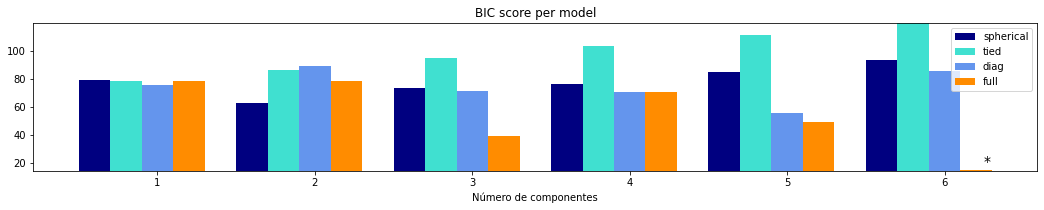

In [346]:
import itertools
import matplotlib.pyplot as plt

# Plot the BIC scores
color_iter = itertools.cycle(['navy', 'turquoise', 'cornflowerblue',
                              'darkorange'])
bars = []
plt.figure(figsize=(18, 6))
spl = plt.subplot(2, 1, 1)
for i, (cv_type, color) in enumerate(zip(cv_types, color_iter)):
    xpos = np.array(n_components_range) + .2 * (i - 2)
    bars.append(plt.bar(xpos, bic[i * len(n_components_range):
                                  (i + 1) * len(n_components_range)],
                        width=.2, color=color))
plt.xticks(n_components_range)
plt.ylim([min(bic) * 1.01 - .01 * max(bic), max(bic)])
plt.title('BIC score per model')
xpos = np.mod(np.argmin(bic), len(n_components_range)) + .65 +\
    .2 * np.floor(np.argmin(bic) / len(n_components_range))
plt.text(xpos, min(bic) * 0.97 + .03 * max(bic), '*', fontsize=14)
spl.set_xlabel('Número de componentes')
spl.legend([b[0] for b in bars], cv_types)

In [347]:
EM = GaussianMixture(n_components=best_k, covariance_type=best_cv, init_params='random')
EM.fit(X_pca)
labels =  EM.predict(X_pca)
n_clusters = best_k - (1 if -1 in labels else 0)

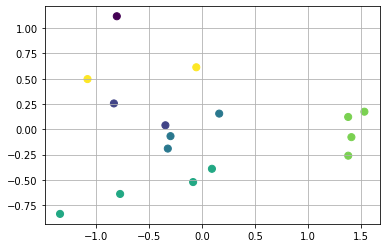

In [348]:
#plotting orginal points with color related to label
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels,s=50)
plt.grid()
plt.show()

# Clustering K-Means (old)

In [349]:
from sklearn import preprocessing 
min_max_scaler = preprocessing.MinMaxScaler()
datanorm = min_max_scaler.fit_transform(sum_df[['Goals', 'Shots']])

NameError: name 'sum_df' is not defined

In [151]:
# parameters
init = 'random' # initialization method 

# to run 10 times with different random centroids 
# to choose the final model as the one with the lowest SSE
iterations = 10

# maximum number of iterations for each single run
max_iter = 300 

# controls the tolerance with regard to the changes in the 
# within-cluster sum-squared-error to declare convergence

tol = 1e-04 

 # random seed
random_state = 0

from sklearn.cluster import KMeans
from sklearn import metrics

distortions = []
silhouettes = []

for i in range(2, 11):
    km = KMeans(i, init, n_init = iterations ,max_iter= max_iter, tol = tol,random_state = random_state)
    labels = km.fit_predict(datanorm)
    distortions.append(km.inertia_)
    silhouettes.append(metrics.silhouette_score(datanorm, labels))

C:\Users\anton\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass init=random as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


NameError: name 'datanorm' is not defined

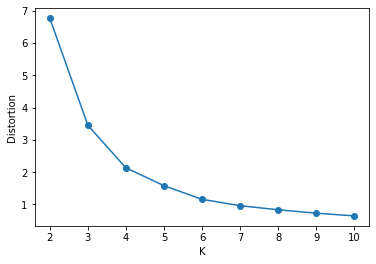

In [25]:
import matplotlib.pyplot as plt
plt.plot(range(2,11), distortions, marker='o')
plt.xlabel('K')
plt.ylabel('Distortion')
plt.show()

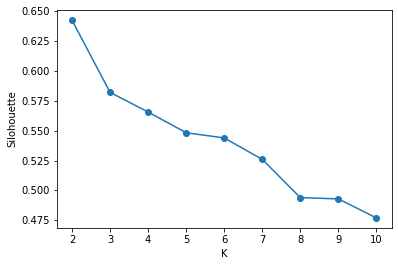

In [27]:
plt.plot(range(2,11), silhouettes , marker='o')
plt.xlabel('K')
plt.ylabel('Silohouette')
plt.show()

In [28]:
k = 10

km = KMeans(k, init, n_init = iterations ,
            max_iter= max_iter, tol = tol, random_state = random_state)

y_km = km.fit_predict(datanorm)

c:\users\alberto\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass init=random as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


In [29]:
from sklearn import metrics
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(datanorm, y_km))
      
print('Distortion: %.2f' % km.inertia_)

Silhouette Coefficient: 0.477
Distortion: 0.64


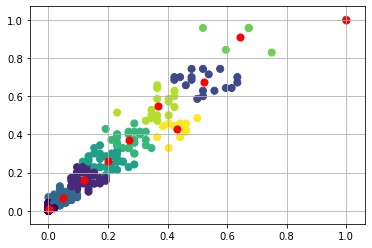

In [31]:
#plotting orginal points with color related to label
plt.scatter(datanorm[:,0], datanorm[:,1], c=km.labels_,s=50)
#plt.scatter(datanorm['Goals'], datanorm['Shots'], c=km.labels_,s=50)
# plotting centroids
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], c='red',s=50)
# 
plt.grid()
plt.show()